In [12]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('cement_data.csv')
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [4]:
df.shape

(1030, 9)

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.shape

(1005, 9)

In [8]:
threshold = 3.5

z_scores = np.abs(stats.zscore(df))

outliers = np.where(z_scores > threshold)

median = np.median(df)

df[(z_scores > threshold)] = median

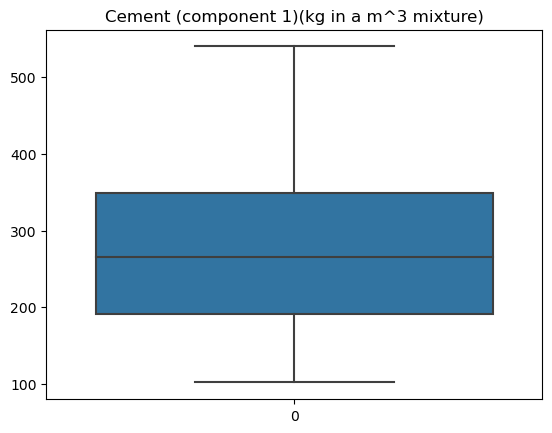

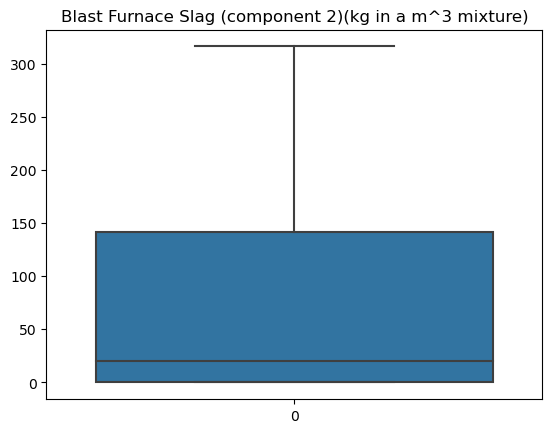

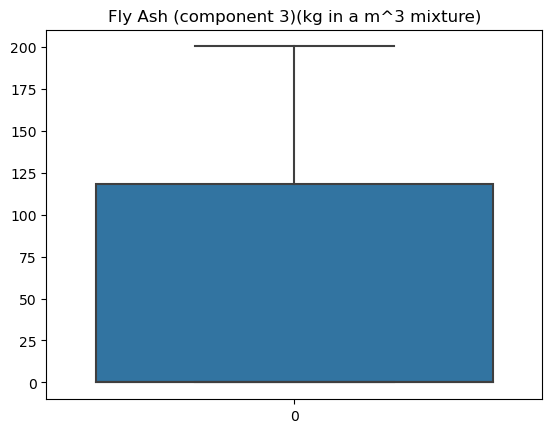

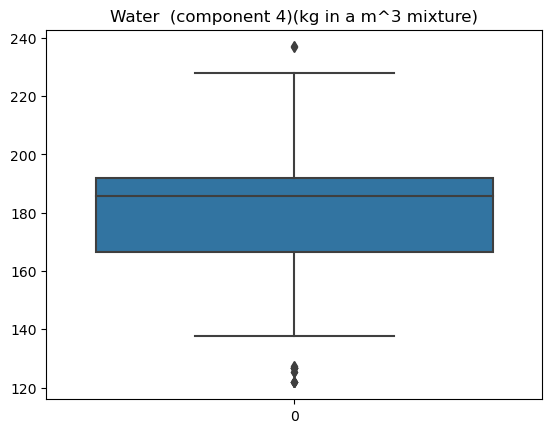

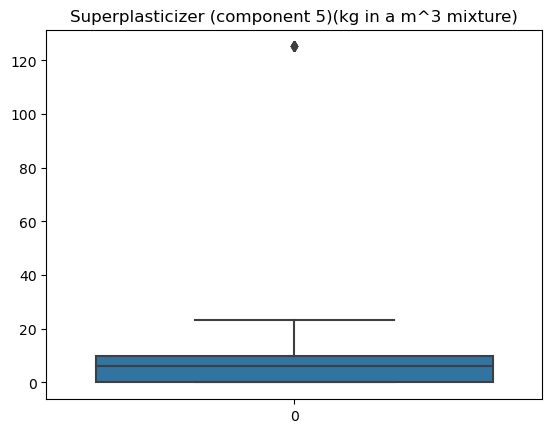

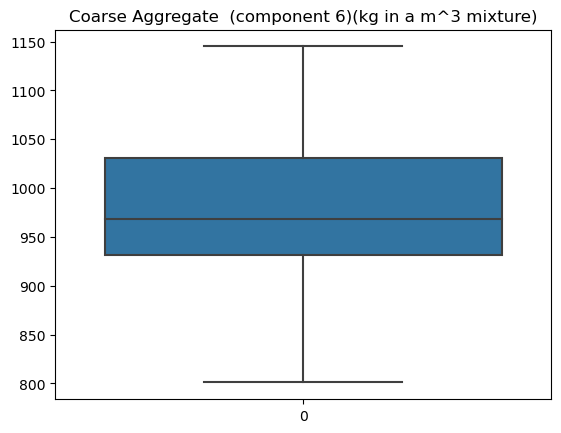

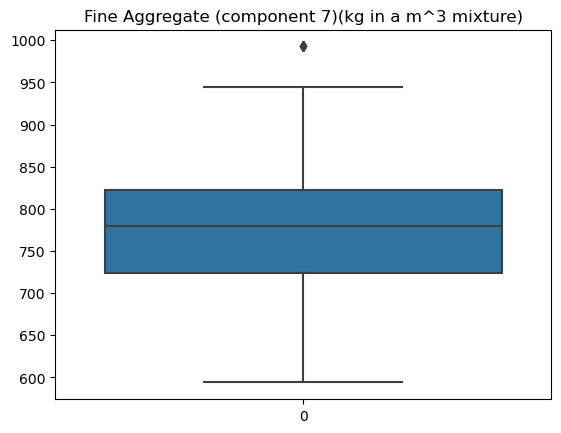

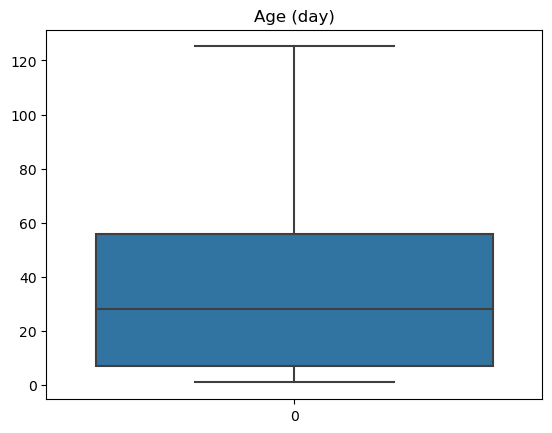

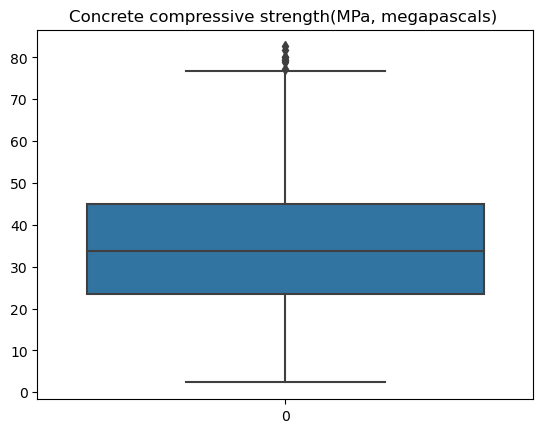

In [13]:
for col in df.columns:
    sns.boxplot(df[col])
    plt.title(col)
    plt.show()

In [14]:
from sklearn.preprocessing import StandardScaler 
from sklearn.pipeline import Pipeline                                                   
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split



X = df.iloc[:,:-1]

y = df.iloc[:,-1]



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


numericals_cols = ['Cement (component 1)(kg in a m^3 mixture)',
                  'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
                  'Fly Ash (component 3)(kg in a m^3 mixture)',
                   'Water  (component 4)(kg in a m^3 mixture)',
                   'Superplasticizer (component 5)(kg in a m^3 mixture)',
                   'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
                   'Fine Aggregate (component 7)(kg in a m^3 mixture)',
                   'Age (day)']



num_pipeline = Pipeline(
    steps=[
    
        ('scaler', StandardScaler())
    ]
)



preprocessor = ColumnTransformer([
       ('num_pipeline', num_pipeline, numericals_cols)
])


X_train = preprocessor.fit_transform(X_train)


X_test = preprocessor.transform(X_test)

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error



models = {
    'Random Forest' : RandomForestRegressor(),
    'Decison Tree' : DecisionTreeRegressor(),
    'svc' : SVR(),
    'LinearRegression' : LinearRegression(),
    'Ridge' : Ridge(),
    'Lasso' : Lasso(),
    'ElasticNet' : ElasticNet(),
    'SVR' : SVR()
}




def evaluate_model(X_train, y_train, X_test, y_test, models):
    report = {}
    for i in range(len(models)):
        model = list(models.values())[i]
        # Train model
        model.fit(X_train, y_train)
        
        # Predicting Data
        y_test_pred = model.predict(X_test)
        
        # Checking Accuracy
        test_model_score = r2_score(y_test, y_test_pred)
        
        report[list(models.keys())[i]] = test_model_score
        
        
    return report    



evaluate_model(X_train, y_train, X_test, y_test, models)

{'Random Forest': 0.9044488338627187,
 'Decison Tree': 0.8611556195280076,
 'svc': 0.6607654351120085,
 'LinearRegression': 0.706926785947473,
 'Ridge': 0.7064588769111851,
 'Lasso': 0.6460289966931865,
 'ElasticNet': 0.5178887721574061,
 'SVR': 0.6607654351120085}

In [17]:
from sklearn.ensemble import RandomForestRegressor

regressor  = RandomForestRegressor()

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

score = r2_score(y_test,y_pred)

print(f"mse : {mse}")
print(f"mae : {mae}")
print(f"rmse : {rmse}")
print(f"R2Score : {score}")

mse : 27.02764644135904
mae : 3.5028815203896446
rmse : 5.198812022121885
R2Score : 0.9094029657615872


In [18]:
from sklearn.model_selection import KFold, cross_val_score

cv = KFold(n_splits=5)

scores = cross_val_score(regressor, X_train, y_train, cv=cv)

np.mean(scores)

0.8839326865037453